<a href="https://colab.research.google.com/github/nse4real/myrepo/blob/master/group_2_stylometry_train_result_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stylometry Model Training Evaluation for Grouping 2 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#  import needed libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import re, string, unicodedata
from tabulate import tabulate
import csv
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

In [3]:
path = os.getcwd() + "/drive/MyDrive/Colab Notebooks/"
print("The present working directory",path)

filenames = ['output-group-2.csv','pca-output-group-2.csv']

The present working directory /content/drive/MyDrive/Colab Notebooks/


## Evaluation of output-group-2.csv with grouping = 2

This file contains the results from training the standard classifiers. The training is repeated 5 times(5 experements). The grouping of tweets in this file is 1. For each experiment, for each classifier, combine the splits by suming them and computing the average.

In [4]:
# read the csv file
output_csv_df = pd.read_csv(path+filenames[0])
output_csv_df = output_csv_df.astype({"cm": str})
# print number df rows and columns
##print(output_csv_df.shape)
#print the column names
#print(output_csv_df.columns)
print(output_csv_df.info())
print()

output_csv_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experiment-Number  120 non-null    int64  
 1   Grouping-Number    120 non-null    object 
 2   Balance-Code       120 non-null    object 
 3   Classifier-Code    120 non-null    object 
 4   Split-Number       120 non-null    int64  
 5   Accuracy           120 non-null    float64
 6   Total-F1           120 non-null    float64
 7   cm                 120 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 7.6+ KB
None



,Experiment-Number,Grouping-Number,Balance-Code,Classifier-Code,Split-Number,Accuracy,Total-F1,cm
0,1,G-1,s,ann,0,0.331313,1.833294,"[[2, 14, 7, 33, 5, 35, 1, 37, 0, 23, 5, 19, 2,..."
1,1,G-1,s,svm,0,0.319192,1.865527,"[[37, 19, 13, 10, 4, 13, 16, 42, 8, 9, 3, 7, 1..."


In [5]:
def convert_cm_to_confusion_matrix(group_cm):
  #print(len(group_cm))
  cm_lists = []
  for cm in group_cm:
    #print(cm)
    num = []
    ch_list = []
    index = 0
    while index < len(cm):
      if cm[index].isdigit():
        num.append(cm[index])
      else:
        if len(num)>0:
          ch_list.append(int("".join(num)))
          num = []
      index+=1
    #print(ch_list)
    cm_lists.append(ch_list)
  final_cm = np.array(cm_lists)
  #print(final_cm)
  f = np.sum(final_cm, axis=0)
  #print(f)
  return f

## group the data by classifier-code and split-number
grouped_df = output_csv_df.groupby(['Experiment-Number','Classifier-Code','Grouping-Number','Balance-Code'])
experiments_result = {
    'Experiment-Number':[],
    'Classifier-Code':[],
    'Grouping-Number':[],
    'Balance-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  experiments_result[i] = []

for name, group in grouped_df:
  experiments_result['Experiment-Number'].append(name[0])
  experiments_result['Classifier-Code'].append(name[1])
  experiments_result['Grouping-Number'].append(name[2])
  experiments_result['Balance-Code'].append(name[3])
  experiments_result['Accuracy'].append(np.mean(group['Accuracy']))
  experiments_result['Total-F1'].append(np.mean(group['Total-F1']))

  cm = convert_cm_to_confusion_matrix(group['cm'])
  for i in range(0,36):
    experiments_result[i].append(cm[i])
  
#print(experiments_result)
print("RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT")
df = pd.DataFrame(experiments_result)
display(df)

RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT


,Experiment-Number,Classifier-Code,Grouping-Number,Balance-Code,Accuracy,Total-F1,0,1,2,3,...,26,27,28,29,30,31,32,33,34,35
0,1,LR,G-1,s,0.387064,2.265069,123,85,40,34,...,9,30,159,38,45,38,30,17,35,150
1,1,NB,G-1,s,0.309761,1.684135,93,53,14,20,...,5,11,210,19,51,29,10,5,118,102
2,1,ann,G-1,s,0.370915,2.110545,56,57,66,65,...,10,26,176,41,28,25,43,39,32,148
3,1,dt,G-1,s,0.348653,1.961910,153,89,18,25,...,10,21,128,28,62,37,12,20,45,139
4,1,rf,G-1,s,0.407277,2.406562,150,65,55,43,...,15,24,162,31,53,16,37,22,35,152
5,1,svm,G-1,s,0.314298,1.840034,126,89,53,55,...,25,28,89,21,48,66,50,36,27,88
6,2,LR,G-1,s,0.387064,2.265069,123,85,40,34,...,9,30,159,38,45,38,30,17,35,150
7,2,NB,G-1,s,0.309761,1.684135,93,53,14,20,...,5,11,210,19,51,29,10,5,118,102
8,2,ann,G-1,s,0.406782,2.405128,160,72,57,35,...,17,24,150,29,50,36,55,30,27,117
9,2,dt,G-1,s,0.348653,1.961910,153,89,18,25,...,10,21,128,28,62,37,12,20,45,139


### Average Matrix for each classifier from 5 experiments

In [6]:
class_column = ['Classifier-Code', 'Accuracy','Total-F1']
class_column.extend(list(range(0,36)))
class_grouped_df = df[class_column].groupby(['Classifier-Code'])
classifier_result = {
    'Classifier-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  classifier_result[i] = []

for name, group in class_grouped_df:
  classifier_result['Classifier-Code'].append(name)
  classifier_result['Accuracy'].append(np.mean(group['Accuracy']))
  classifier_result['Total-F1'].append(np.mean(group['Total-F1']))
  for i in range(0,36):
    classifier_result[i].append(int(np.mean(group[i])))

print("RESULT OF EACH CLASSIFIES")
df2 = pd.DataFrame(classifier_result)
display(df2)

RESULT OF EACH CLASSIFIES


,Classifier-Code,Accuracy,Total-F1,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,LR,0.387064,2.265069,123,85,40,34,31,74,56,...,9,30,159,38,45,38,30,17,35,150
1,NB,0.309761,1.684135,93,53,14,20,138,69,49,...,5,11,210,19,51,29,10,5,118,102
2,ann,0.395568,2.293768,123,72,45,39,31,75,52,...,10,24,167,32,44,33,38,27,35,136
3,dt,0.348653,1.961910,153,89,18,25,17,85,68,...,10,21,128,28,62,37,12,20,45,139
4,rf,0.394941,2.330996,148,66,56,41,20,53,59,...,17,24,160,29,54,17,34,23,36,149
5,svm,0.314298,1.840034,126,89,53,55,19,45,50,...,25,28,89,21,48,66,50,36,27,88


### Precision, Recall,Confusion matrix for each classifier

Precision and recall for LR


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.317829  0.370482
askanyone       0.56305   0.451765
harlancoben     0.204204  0.314815
megcabot        0.234921  0.305785
paulocoelho     0.552083  0.463557
tejucole        0.47619   0.356295


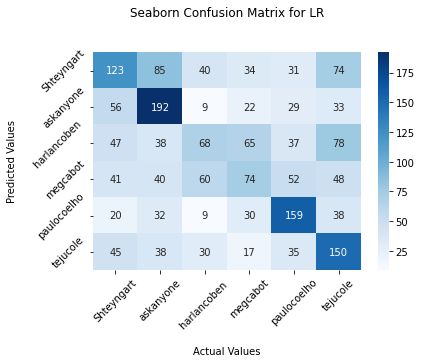

Precision and recall for NB


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.24031   0.303922
askanyone       0.407625  0.435737
harlancoben     0.111111  0.345794
megcabot        0.101587  0.313725
paulocoelho     0.729167  0.255786
tejucole        0.32381   0.314815


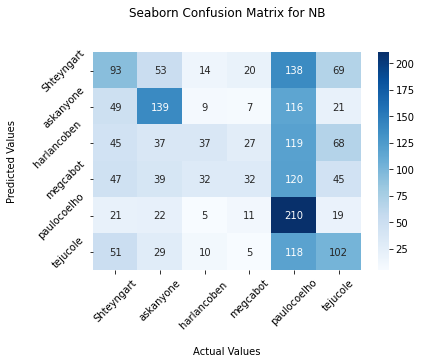

Precision and recall for ann


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.319481  0.361765
askanyone       0.556213  0.478372
harlancoben     0.229607  0.320675
megcabot        0.289809  0.33829
paulocoelho     0.585965  0.485465
tejucole        0.434505  0.355091


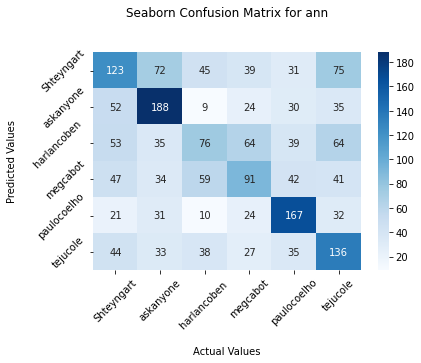

Precision and recall for dt


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.395349  0.31677
askanyone       0.507331  0.394077
harlancoben     0.117117  0.278571
megcabot        0.184127  0.302083
paulocoelho     0.444444  0.402516
tejucole        0.44127   0.341523


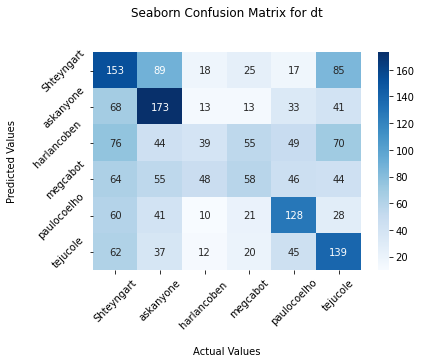

Precision and recall for rf


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.385417  0.354067
askanyone       0.557864  0.493438
harlancoben     0.182371  0.241935
megcabot        0.236422  0.303279
paulocoelho     0.561404  0.507937
tejucole        0.476038  0.419718


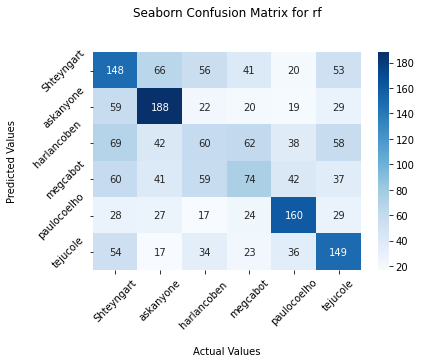

Precision and recall for svm


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.325581  0.346154
askanyone       0.545455  0.306425
harlancoben     0.174174  0.230159
megcabot        0.238095  0.252525
paulocoelho     0.309028  0.429952
tejucole        0.279365  0.349206


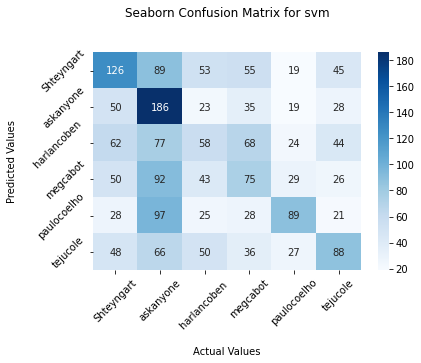

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [7]:
class_labels = ['Shteyngart', 'askanyone', 'harlancoben ', 'megcabot','paulocoelho', 'tejucole']

def print_precision_recall(cf_matrix):
  metrics = {"username":class_labels,"precision":[],"recall":[]}
  row_sum = np.sum(cf_matrix,axis=1)
  col_sum = np.sum(cf_matrix, axis=0)
  for i in range(len(class_labels)):
    metrics['precision'].append(cf_matrix[i,i]/row_sum[i]) 
    metrics['recall'].append(cf_matrix[i,i]/col_sum[i]) 
  print(tabulate(metrics,  headers=["Username","Precision","Recall"])) 

def plot_confusion_matrix(df_row):
  matrix_values = np.array(df_row.iloc[list(range(3,39))],dtype='i')
  cf_matrix = matrix_values.reshape(6, 6)

  print(f'Precision and recall for {df_row["Classifier-Code"]}\n\n')
  print_precision_recall(cf_matrix)

  ax = sns.heatmap(cf_matrix, fmt='g', annot=True, cmap='Blues')
  ax.set_title(f'Seaborn Confusion Matrix for {df_row["Classifier-Code"]}\n\n');
  ax.set_xlabel('\nActual Values')
  ax.set_ylabel('Predicted Values\n');
  ax.xaxis.set_ticklabels(class_labels,rotation=45)
  ax.yaxis.set_ticklabels(class_labels,rotation=45)
  ## Display the visualization of the Confusion Matrix.
  plt.show()

df2.apply(plot_confusion_matrix,axis=1)

## Evaluating for PCA output with grouping = 2

In [8]:
# read the csv file
pca_output_csv_df = pd.read_csv(path+filenames[1])
pca_output_csv_df = pca_output_csv_df.astype({"cm": str})
# print number df rows and columns
#print(pca_output_csv_df.shape)
#print the column names
#print(pca_output_csv_df.columns)
print(pca_output_csv_df.info())
print()

pca_output_csv_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experiment-Number  120 non-null    int64  
 1   Grouping-Number    120 non-null    object 
 2   Balance-Code       120 non-null    object 
 3   Classifier-Code    120 non-null    object 
 4   Split-Number       120 non-null    int64  
 5   Accuracy           120 non-null    float64
 6   Total-F1           120 non-null    float64
 7   cm                 120 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 7.6+ KB
None



,Experiment-Number,Grouping-Number,Balance-Code,Classifier-Code,Split-Number,Accuracy,Total-F1,cm
0,1,G-1,s,ann,0,0.375758,2.171048,"[[27, 20, 5, 11, 14, 19, 17, 33, 2, 7, 11, 15,..."
1,1,G-1,s,svm,0,0.319192,1.865527,"[[37, 19, 13, 10, 4, 13, 16, 42, 8, 9, 3, 7, 1..."


In [9]:
## group the data by classifier-code and split-number
pca_grouped_df = pca_output_csv_df.groupby(['Experiment-Number','Classifier-Code','Grouping-Number','Balance-Code'])
pca_experiments_result = {
    'Experiment-Number':[],
    'Classifier-Code':[],
    'Grouping-Number':[],
    'Balance-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  pca_experiments_result[i] = []

for name, group in pca_grouped_df:
  pca_experiments_result['Experiment-Number'].append(name[0])
  pca_experiments_result['Classifier-Code'].append(name[1])
  pca_experiments_result['Grouping-Number'].append(name[2])
  pca_experiments_result['Balance-Code'].append(name[3])
  pca_experiments_result['Accuracy'].append(np.mean(group['Accuracy']))
  pca_experiments_result['Total-F1'].append(np.mean(group['Total-F1']))

  cm = convert_cm_to_confusion_matrix(group['cm'])
  for i in range(0,36):
    pca_experiments_result[i].append(cm[i])
  
#print(experiments_result)
print("PCA RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT")
pca_df = pd.DataFrame(pca_experiments_result)
display(pca_df)

PCA RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT


,Experiment-Number,Classifier-Code,Grouping-Number,Balance-Code,Accuracy,Total-F1,0,1,2,3,...,26,27,28,29,30,31,32,33,34,35
0,1,LR,G-1,s,0.405261,2.368940,151,76,32,29,...,13,28,167,27,55,35,32,12,41,140
1,1,NB,G-1,s,0.403242,2.273045,266,45,11,14,...,7,20,153,22,118,10,12,13,31,131
2,1,ann,G-1,s,0.410313,2.394655,105,72,48,42,...,15,15,182,32,29,25,12,27,41,181
3,1,dt,G-1,s,0.341593,1.959784,103,70,74,33,...,24,21,151,23,33,36,49,26,30,141
4,1,rf,G-1,s,0.402743,2.385276,155,72,44,41,...,17,25,162,30,46,31,42,21,28,147
5,1,svm,G-1,s,0.314298,1.840034,126,89,53,55,...,25,28,89,21,48,66,50,36,27,88
6,2,LR,G-1,s,0.405261,2.368940,151,76,32,29,...,13,28,167,27,55,35,32,12,41,140
7,2,NB,G-1,s,0.403242,2.273045,266,45,11,14,...,7,20,153,22,118,10,12,13,31,131
8,2,ann,G-1,s,0.407286,2.368106,138,104,48,30,...,21,18,169,25,46,39,36,21,42,131
9,2,dt,G-1,s,0.341593,1.959784,103,70,74,33,...,24,21,151,23,33,36,49,26,30,141


### Average Matrix for each classifier from 5 experiments

In [10]:
pca_class_grouped_df = pca_df[class_column].groupby(['Classifier-Code'])
pca_classifier_result = {
    'Classifier-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  pca_classifier_result[i] = []

for name, group in pca_class_grouped_df:
  pca_classifier_result['Classifier-Code'].append(name)
  pca_classifier_result['Accuracy'].append(np.mean(group['Accuracy']))
  pca_classifier_result['Total-F1'].append(np.mean(group['Total-F1']))
  for i in range(0,36):
    pca_classifier_result[i].append(int(np.mean(group[i])))

print("PCA RESULT OF EACH CLASSIFIER")
pca_df2 = pd.DataFrame(pca_classifier_result)
display(pca_df2)

PCA RESULT OF EACH CLASSIFIER


,Classifier-Code,Accuracy,Total-F1,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,LR,0.405261,2.368940,151,76,32,29,38,61,52,...,13,28,167,27,55,35,32,12,41,140
1,NB,0.403242,2.273045,266,45,11,14,16,35,115,...,7,20,153,22,118,10,12,13,31,131
2,ann,0.408501,2.381229,127,88,44,37,35,54,47,...,16,18,171,27,41,38,25,20,37,152
3,dt,0.341593,1.959784,103,70,74,33,38,69,56,...,24,21,151,23,33,36,49,26,30,141
4,rf,0.404758,2.405407,154,67,47,42,17,59,61,...,16,27,160,29,48,28,40,22,29,146
5,svm,0.314298,1.840034,126,89,53,55,19,45,50,...,25,28,89,21,48,66,50,36,27,88


### Precision, Recall,Confusion matrix for each classifier

PCA ANALYSIS


Precision and recall for LR


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.390181  0.397368
askanyone       0.580645  0.482927
harlancoben     0.204204  0.322275
megcabot        0.247619  0.337662
paulocoelho     0.579861  0.444149
tejucole        0.444444  0.377358


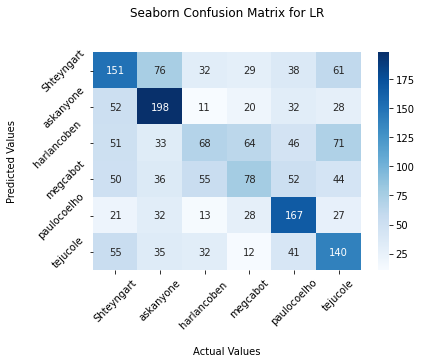

Precision and recall for NB


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.687339  0.32598
askanyone       0.454545  0.536332
harlancoben     0.135135  0.357143
megcabot        0.152381  0.340426
paulocoelho     0.53125   0.5
tejucole        0.415873  0.435216


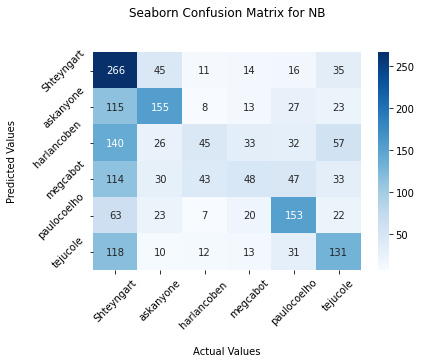

Precision and recall for ann


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.32987   0.393189
askanyone       0.589971  0.444444
harlancoben     0.229607  0.331878
megcabot        0.259615  0.36
paulocoelho     0.597902  0.464674
tejucole        0.485623  0.409704


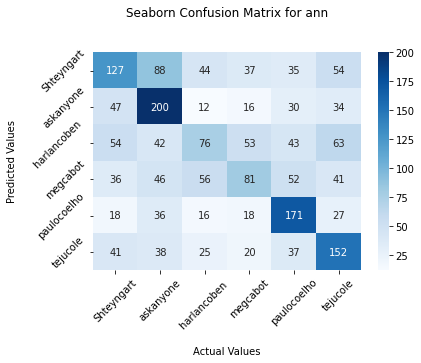

Precision and recall for dt


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.26615   0.336601
askanyone       0.40176   0.374317
harlancoben     0.207207  0.221154
megcabot        0.238095  0.307377
paulocoelho     0.524306  0.397368
tejucole        0.447619  0.380054


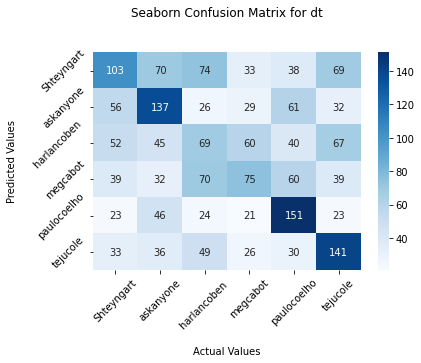

Precision and recall for rf


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.398964  0.382134
askanyone       0.525074  0.462338
harlancoben     0.23565   0.3
megcabot        0.266026  0.315589
paulocoelho     0.557491  0.531561
tejucole        0.466454  0.410112


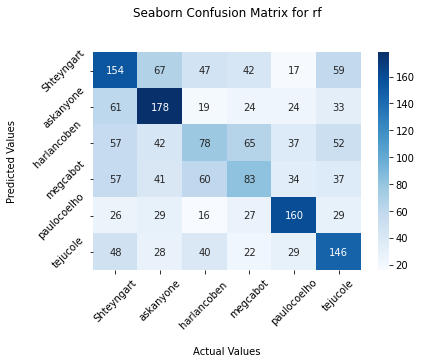

Precision and recall for svm


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.325581  0.346154
askanyone       0.545455  0.306425
harlancoben     0.174174  0.230159
megcabot        0.238095  0.252525
paulocoelho     0.309028  0.429952
tejucole        0.279365  0.349206


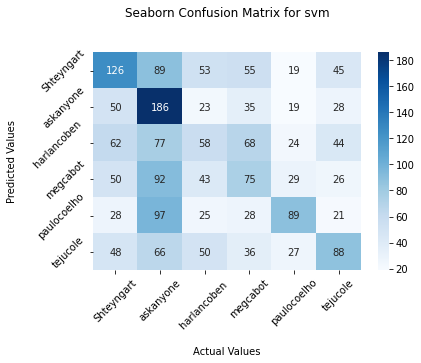

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [11]:
print("PCA ANALYSIS\n\n")
class_labels = ['Shteyngart', 'askanyone', 'harlancoben ', 'megcabot','paulocoelho', 'tejucole']
pca_df2.apply(plot_confusion_matrix,axis=1)